# 线性回归（单变量）

## 引入需要的库

In [97]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

## 导入数据

In [151]:
dataload=np.loadtxt('data1.txt')
x_train = dataload[:,0]
y_train = dataload[:,1]
x_train

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [152]:
m=x_train.shape[0]
print(m)

100


## 成本函数

In [153]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        cost+=(w*x[i]+b-y[i])**2
    total_cost=cost/(2*m)
    return total_cost

## 梯度的计算

In [154]:
def  compute_gradient(x,y,w,b):
    m=x.shape[0]
    d_w=0
    d_b=0
    for i in range(m):
        f_wb=w*x[i]+b
        d_w_i=(f_wb-y[i])*x[i]
        d_b_i=(f_wb-y[i])
        d_w+=d_w_i
        d_b+=d_b_i
    d_w=d_w/m
    d_b=d_b/m
    return d_w,d_b

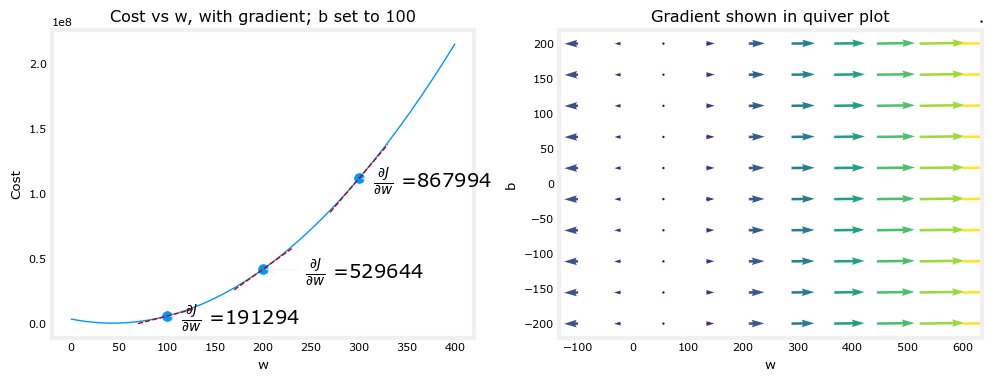

In [155]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [156]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w=copy.deepcopy(w_in)
    J_History=[]
    p_History=[]
    b=b_in
    w=w_in
    for i in range(num_iters):
        d_w,d_b=gradient_function(x,y,w,b)
        w=w-alpha*d_w
        b=b-alpha*d_b
        if i<100000:
            J_History.append(compute_cost(x, y, w , b))
            p_History.append([w,b])
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_History[-1]:0.2e} ",
                  f"dj_dw: {d_w: 0.3e}, dj_db: {d_b: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, J_History, p_History       

In [177]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-4

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iter    0: Cost 1.65e+06, dw: -1.521e+05, db: -2.529e+03, w: 1.521e+01, b: 2.52860e-01
Iter 1000: Cost 1.43e+05, dw: 3.760e+00, db: -2.519e+02, w: 4.457e+01, b: 2.61964e+01
Iter 2000: Cost 1.36e+05, dw: 3.668e+00, db: -2.457e+02, w: 4.419e+01, b: 5.10758e+01
Iter 3000: Cost 1.31e+05, dw: 3.579e+00, db: -2.398e+02, w: 4.383e+01, b: 7.53502e+01
Iter 4000: Cost 1.25e+05, dw: 3.492e+00, db: -2.339e+02, w: 4.348e+01, b: 9.90342e+01
Iter 5000: Cost 1.20e+05, dw: 3.407e+00, db: -2.282e+02, w: 4.313e+01, b: 1.22142e+02
Iter 6000: Cost 1.15e+05, dw: 3.324e+00, db: -2.227e+02, w: 4.280e+01, b: 1.44688e+02
Iter 7000: Cost 1.10e+05, dw: 3.243e+00, db: -2.173e+02, w: 4.247e+01, b: 1.66686e+02
Iter 8000: Cost 1.05e+05, dw: 3.164e+00, db: -2.120e+02, w: 4.215e+01, b: 1.88148e+02
Iter 9000: Cost 1.01e+05, dw: 3.087e+00, db: -2.068e+02, w: 4.184e+01, b: 2.09089e+02
(w,b) found by gradient descent: ( 41.5305,229.5003)


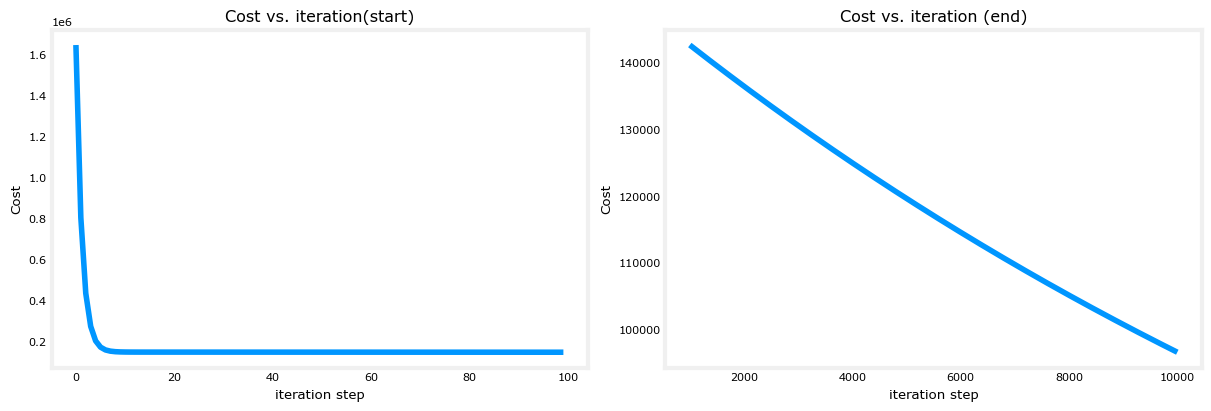

In [173]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()